# Modeling Standing Wave Amplitudes with Experimental Data and Theoretical Model

In [8]:
# Import Libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
from Unit0 import model_utils

In [9]:
# Constants
voltage = 1.5
resistance = 10

length = 1.12
linear_density = 0.000222

masses = [0.02, 0.05, 0.07, 0.2]

Frequency: 13 Hz, Predicted Energy: 0.004517599133868492 J, Experimental Energy: 0.0008079013668943682 J
Frequency: 29 Hz, Predicted Energy: 0.003977618925212446 J, Experimental Energy: 0.0015851057860410754 J
Frequency: 42 Hz, Predicted Energy: 0.004014073291506278 J, Experimental Energy: 0.00241262031277942 J
Frequency: 54 Hz, Predicted Energy: 0.004046448992120088 J, Experimental Energy: 0.001930021789424568 J
Frequency: 67 Hz, Predicted Energy: 0.003977204221726266 J, Experimental Energy: 0.0014043317115429326 J
Frequency: 81 Hz, Predicted Energy: 0.0038842607907890697 J, Experimental Energy: 0.0008311910244766641 J


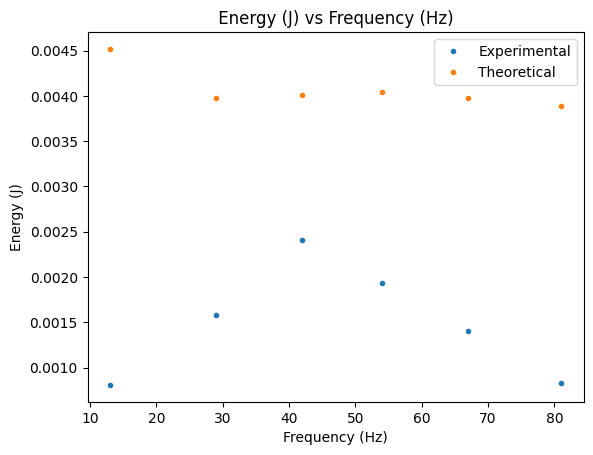

Frequency: 22 Hz, Predicted Energy: 0.0026694903972859273 J, Experimental Energy: 0.0028831189693873174 J
Frequency: 43 Hz, Predicted Energy: 0.0026825802053758356 J, Experimental Energy: 0.0037478974653561235 J
Frequency: 65 Hz, Predicted Energy: 0.0025937088960502103 J, Experimental Energy: 0.002141004163304569 J
Frequency: 85 Hz, Predicted Energy: 0.0025706852420527616 J, Experimental Energy: 0.001513065042164985 J
Frequency: 108 Hz, Predicted Energy: 0.002467339656070925 J, Experimental Energy: 0.001930021789424568 J
Frequency: 130 Hz, Predicted Energy: 0.0024201932619531893 J, Experimental Energy: 0.0021410041630324068 J


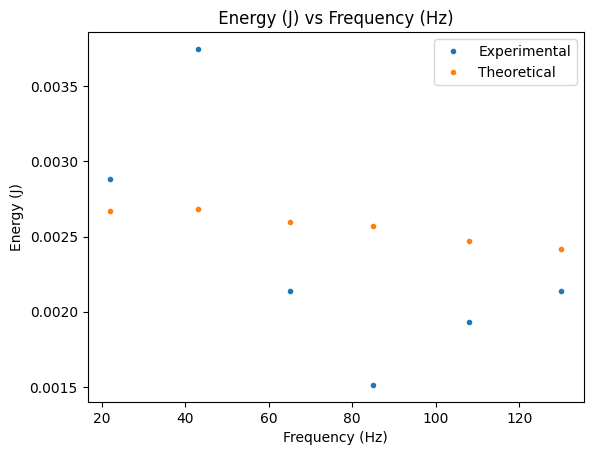

Frequency: 25 Hz, Predicted Energy: 0.002349151549611616 J, Experimental Energy: 0.0031283842983803353 J
Frequency: 46 Hz, Predicted Energy: 0.0025076293224165426 J, Experimental Energy: 0.0026478644701491156 J
Frequency: 75 Hz, Predicted Energy: 0.0022478810432435157 J, Experimental Energy: 0.002094207670905326 J
Frequency: 101 Hz, Predicted Energy: 0.002163447975984997 J, Experimental Energy: 0.0021363012450000014 J
Frequency: 126 Hz, Predicted Energy: 0.0021148625623465065 J, Experimental Energy: 0.002626974102272328 J
Frequency: 146 Hz, Predicted Energy: 0.002154966603109004 J, Experimental Energy: 0.002700452351431881 J


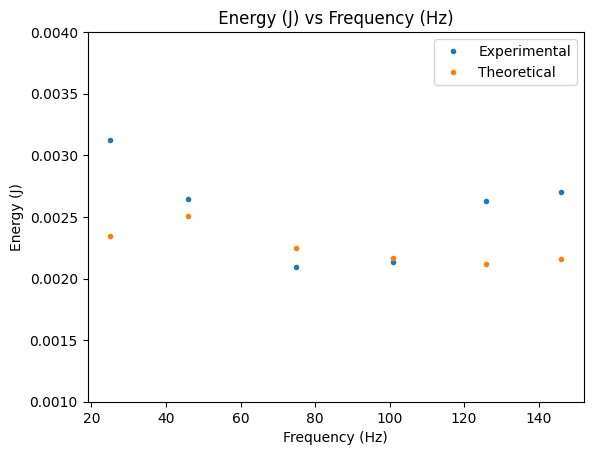

Frequency: 44 Hz, Predicted Energy: 0.0013347451986429637 J, Experimental Energy: 0.028155458685423018 J
Frequency: 85 Hz, Predicted Energy: 0.0013570699862489523 J, Experimental Energy: 0.004202958450458292 J
Frequency: 132 Hz, Predicted Energy: 0.001277205138206543 J, Experimental Energy: 0.006487017681396338 J
Frequency: 151 Hz, Predicted Energy: 0.00144707447400321 J, Experimental Energy: 0.004775002910228902 J
Frequency: 173 Hz, Predicted Energy: 0.0015403045251772246 J, Experimental Energy: 0.004952299565816862 J
Frequency: 215 Hz, Predicted Energy: 0.0014633726700182075 J, Experimental Energy: 0.0019121925842033182 J


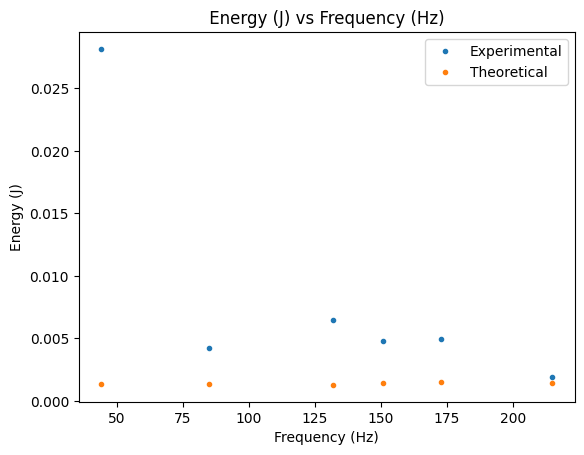

In [10]:
# E = voltage ** 2 / resistance * (length / (2 * frequency * wavelength) - sin(8 * pi * length / wavelength) / (8 * pi * frequency))
# E = linear_density * wavelength * pi ** 2 * frequency ** 2 * amplitude ** 2

def compute_amplitudes(mass):
    def predict_energy(frequency, wavelength):
        energy = voltage ** 2 / resistance * (length / (2 * frequency * wavelength) - math.sin(8 * math.pi * length / wavelength) / (8 * math.pi * frequency))
        return energy

    def compute_energy(frequency, wavelength, waves, amplitude):
        energy = waves * linear_density * wavelength * math.pi ** 2 * frequency ** 2 * amplitude ** 2
        return energy

    data = pd.read_csv(f"Data/{length}m {voltage}V {mass}kg.csv")
    frequencies = data["Frequency (Hz)"]
    wavelengths = data["Wavelength (m)"]
    waves = data["Waves"]
    amplitudes = data["Amplitude (m)"]
    predicted_energies = []
    energies = []
    for i in range(len(frequencies)):
        predicted_energies.append(predict_energy(frequencies[i], wavelengths[i]))
        energies.append(compute_energy(frequencies[i], wavelengths[i], waves[i], amplitudes[i]))
        print(f"Frequency: {frequencies[i]} Hz, Predicted Energy: {predicted_energies[i]} J, Experimental Energy: {energies[i]} J")

    if mass == 0.07: plt.ylim(0.001, 0.004)
    model_utils.graph([(frequencies, energies, "Experimental"), (frequencies, predicted_energies, "Theoretical")], "Energy", "J", "Frequency", "Hz", type=".", directory=f"Graphs/Energy_{length}m_{voltage}V_{mass}kg")


for mass in masses:
    compute_amplitudes(mass)